In [ ]:
#En este ejemplo utilizaremos redes neuronales con propagación hacia adelante para reconocer dígitos escritos a mano (de 0 a 9).

#El reconocimiento automático de dígitos es ampliamente utilizado en la actualidad- desde el reconocimiento de códigos
#postales en sobre hasta el reconocimiento de cantidades escritos en cheques bancarios.

#El dataset contiene 5000 digitos donde cada fila corresponde a datos de la imagen en escala de grises de 20px x 20px. Es
#decir, tenemos 400 atributos o pixeles que representan a cada dígito. Cada pixel contiene un número real correspondiente
#a la intensidad de la escala de gris correspondiente a dicha ubicación.

#Por otro lado se tiene un vector de 5000x1 que corresponde al dígito que se está representando (la clase a reconocer).
#En este caso se tienen clases del 1 al 10 donde el 10 mapea el valor 0. Esto hace que sean más facil manejar los indices.

#En este ejemplo fueron provistos los pesos de los parámetros de la red.

In [4]:
#Configuraciones iniciales
options(scipen = 999, repr.plot.width=4, repr.plot.height= 4, warn = -1)

In [5]:
#Instalación y carga de paquetes necesarios
list.of.packages <- c('R.matlab')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(R.matlab)

R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



In [6]:
#Carga de datos

digits <- as.data.frame(readMat('ex3data1.mat')) #valores de los pixeles de los digitos a reconocer

weights <- readMat('ex3weights.mat') #pesos para la red neuronal

str(digits)
str(weights)

'data.frame':	5000 obs. of  401 variables:
 $ X.1  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.2  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.3  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.4  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.5  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.6  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.7  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.8  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.9  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.10 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.11 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.12 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.13 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.14 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.15 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.16 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.17 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.18 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.19 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.20 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.21 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.22 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.23 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.24 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.25 : num  0 0 0 

In [7]:
#Preparación e incialización de datos
X <- as.matrix(digits[, 1:400])
y <- digits[, 401]

Theta1 <- weights[[1]]
Theta2 <- weights[[2]]

input_layer_size <- 400  #Neuornas de entrada en la primer capa
hidden_layer_size <- 25  #Neuronas en la capa oculta
num_labels <- 10         #Neuronas en la tercer capa / clases a predecir

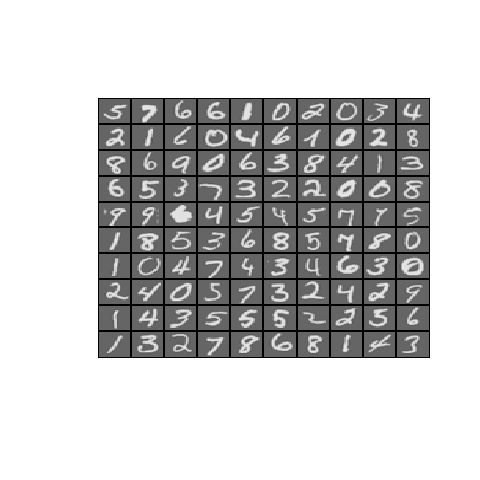

In [8]:
#Visualizamos una muestra del dataset

m <- nrow(X)
rand_indices <- sample(m, 100)
sel <- X[rand_indices, ]

visualizarDigitos <- function(X) {
    
    
    example_width <- round(sqrt(dim(X)[2]))
    
    if (is.vector(X))
        X <- t(X)
  
    # Calcular número de filas y columnas
    m <- dim(X)[1]
    n <- dim(X)[2]

    example_height <- (n / example_width) #altura en pixeles de c/imagen

    # Cantidad de observaciones a mostrar
    display_rows <- floor(sqrt(m)) #10
    display_cols <- ceiling(m / display_rows) #10
           
    # Espaciado entre dígitos
    pad <- 1

    display_array <- -matrix(0,pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad))
    curr_ex <- 1

    for (j in 1:display_rows) {
        for (i in 1:display_cols) {
          if (curr_ex > m)
            break
      
          max_val <- max(abs(X[curr_ex,]))
          display_array[pad + (j - 1) * (example_height + pad) + (1:example_height), pad + (i - 1) * (example_width + pad) + 
                        (1:example_width)] <- matrix(unlist(X[curr_ex,]), example_height, example_width) / max_val
          curr_ex <- curr_ex + 1
        }
    
        if (curr_ex > m)
          break
    }

    # Mostrar imagen
    #op <- par(bg = "gray")

    #La imagen se dibuja por fila de abajo a arriba, pero R indexa las matrices por columnas, de arriba a abajo
    dispArr <- t(apply(display_array,2,rev))

    image(z = dispArr, col = gray.colors(100), xaxt = 'n', yaxt = 'n')

    grid(nx = display_cols, display_rows, col = 'black', lwd = 2, lty = 1)
    box()
    #par(op)
    
}
        

visualizarDigitos(sel)

In [9]:
#Creamos la función sigmoidal
sigmoid <- function(z) {
  
  g <- 1 / (1 + exp(1) ^ (-z))
}

In [10]:
#Creamos la función para predecir con redes neuronales utilizando 25 neuronas en la capa oculta
predecir <- function(Theta1, Theta2, X) {
    
    m <- nrow(X)
    num_labels <- nrow(Theta2)
    p <- matrix(0, m, 1)
    
    
    X <- cbind(1, X)
    
    hyp1 <- sigmoid(X %*% t(Theta1))
    hyp1 <- cbind(1, hyp1)
    
    hyp2 <- sigmoid(hyp1 %*% t(Theta2))
    
    p <- apply(hyp2, 1, which.max)

}

In [11]:
#Predecimos los digitos utilizando los pesos provistos
pred <- predecir(Theta1, Theta2, X)

In [12]:
#Medimos la precisión del modelo construido contrastando las predicciones y los valores reales
mean(pred == y) * 100

[1] 97.52

In [13]:
#Y podemos ver las clasificaciones erróneas y acertadas
table(predicciones = pred, valores_actuales = y)

            valores_actuales
predicciones   1   2   3   4   5   6   7   8   9  10
          1  491   1   2   2   0   2   3   4   2   0
          2    1 485   2   2   1   0   2   1   0   0
          3    1   0 480   0   4   0   1   1   4   0
          4    2   3   0 484   1   0   4   2   2   1
          5    0   1   8   0 492   3   0   1   1   0
          6    0   3   1   3   2 493   0   0   1   1
          7    1   1   4   0   0   0 485   0   5   0
          8    3   2   1   1   0   0   0 491   3   1
          9    1   1   2   8   0   0   4   0 479   1
          10   0   3   0   0   0   2   1   0   3 496